## Import All Libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report
)
from sklearn.metrics import roc_auc_score, roc_curve

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load and Explore Dataset

In [3]:
# Load dataset (Kaggle se download karo: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
data = pd.read_csv('creditcard.csv')

In [4]:
# Pehle 5 rows dikhao
display(data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Dataset basic info
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
# Class distribution check 
print("\nClass Distribution (0 = Normal, 1 = Fraud):")
print(data['Class'].value_counts())


Class Distribution (0 = Normal, 1 = Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# Missing values check
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Feature Engineering

In [9]:
# 1. Time-Based Features
data['Hour'] = (data['Time'] // 3600) % 24  # Convert seconds to hour of day
data['Is_Night'] = data['Hour'].apply(lambda x: 1 if 0 <= x <= 6 else 0)  # Night transactions (12 AM - 6 AM)

In [10]:
# 2. Amount-Based Features
data['Log_Amount'] = np.log1p(data['Amount'])  # Log transform to reduce skewness
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()
data['Amount_ZScore'] = (data['Amount'] - mean_amount) / std_amount  # Z-score of amount

In [11]:
# 3. Statistical Features
v_features = [f'V{i}' for i in range(1, 29)]
data['V_Mean'] = data[v_features].mean(axis=1)
data['V_Std'] = data[v_features].std(axis=1)


In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Is_Night', 'Log_Amount', 'Amount_ZScore', 'V_Mean',
       'V_Std'],
      dtype='object')

In [13]:
# Drop original Time and Amount (replaced by engineered features)
data = data.drop(['Time', 'Amount'], axis=1)

## Data Preprocessing

In [15]:
# Features aur target alag karo
X = data.drop('Class', axis=1)
y = data['Class']

In [16]:
data.duplicated().any()

True

In [17]:
print("\nNumber of duplicated:")
data.duplicated().sum()


Number of duplicated:


3885

In [18]:
# Remove duplication
new_data = data.drop_duplicates()
new_data.shape

(280922, 35)

In [19]:
new_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Hour',
       'Is_Night', 'Log_Amount', 'Amount_ZScore', 'V_Mean', 'V_Std'],
      dtype='object')

In [20]:
new_data.duplicated().any()

False

In [21]:
# Class distribution 
print("\nClass Distribution (0 = Normal, 1 = Fraud):")
print(new_data['Class'].value_counts())


Class Distribution (0 = Normal, 1 = Fraud):
Class
0    280449
1       473
Name: count, dtype: int64


In [22]:
# Scaling karo (Amount aur Time ko scale karna zaroori hai)
from sklearn.preprocessing import StandardScaler
# Scaling karo (new numerical features ko scale karna zaroori hai)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [23]:
# Data ko train-test mein split karo (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Dono sets mein same ratio maintain karo
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (227845, 34)
Testing set shape: (56962, 34)


## Handle Imbalanced Data (SMOTE)

In [25]:
print("Original Class Distribution in Training Set:")
print(y_train.value_counts())

# SMOTE apply karo taki fraud cases artificially increase ho
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE, Class Distribution:\n", pd.Series(y_train_smote).value_counts())


Original Class Distribution in Training Set:
Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE, Class Distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


## Data Visualization

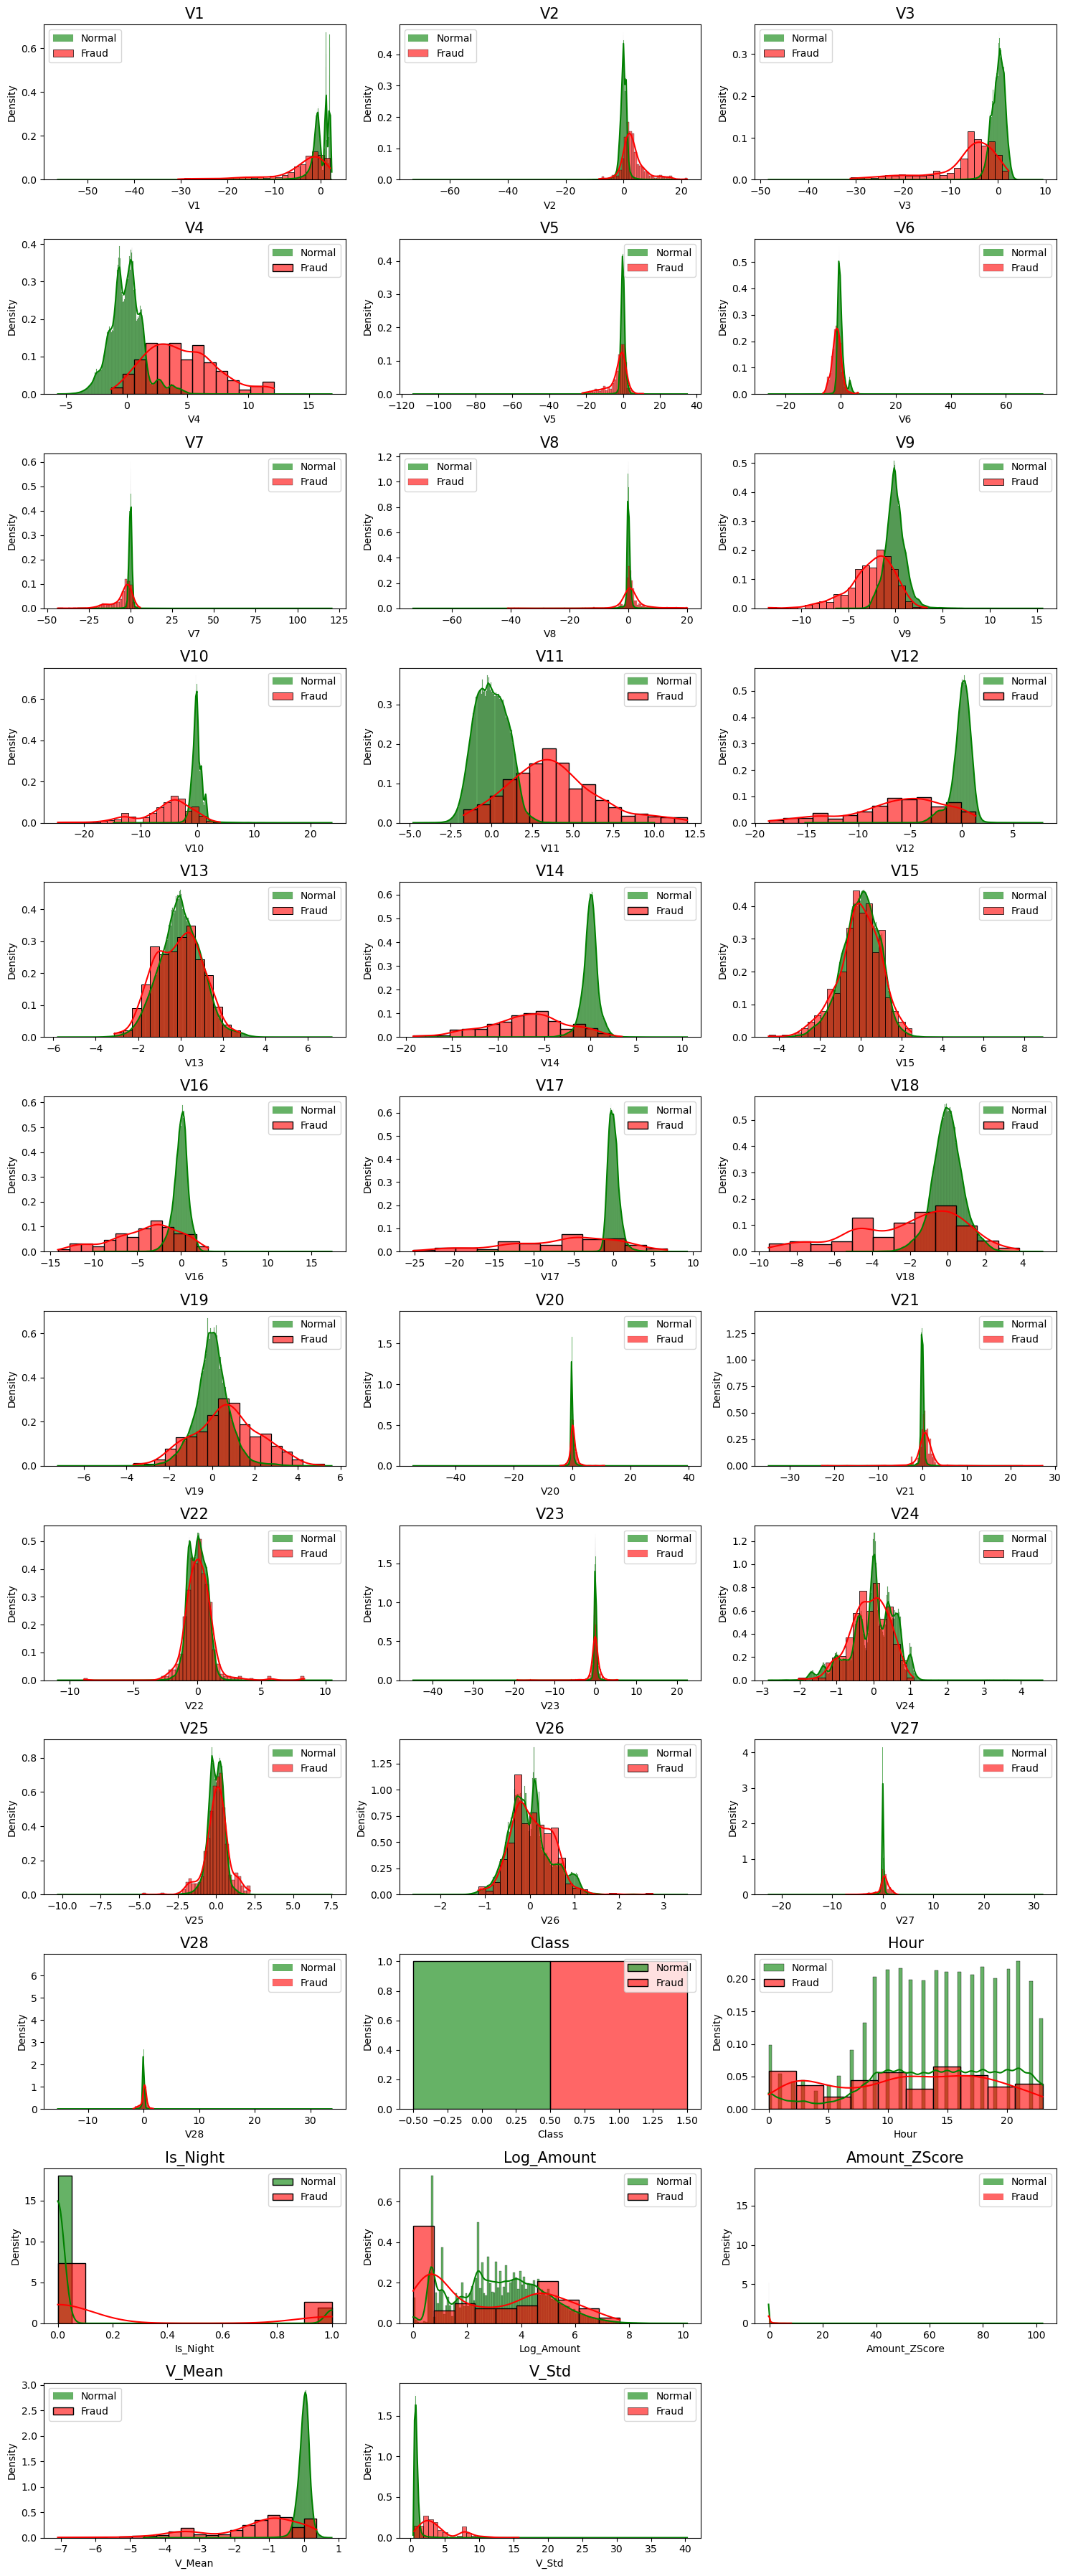

In [27]:
import numpy as np

normal_records = new_data.Class == 0
fraud_records = new_data.Class == 1

num_cols = len(new_data.columns)
rows = int(np.ceil(num_cols / 3)) 
plt.figure(figsize=(15, rows * 3))

for n, col in enumerate(new_data.columns):
    plt.subplot(rows, 3, n + 1)  
    if new_data[col].dtype in ['int64', 'float64']: 
        sns.histplot(new_data.loc[normal_records, col], color='green', kde=True, stat="density", label='Normal', alpha=0.6)
        sns.histplot(new_data.loc[fraud_records, col], color='red', kde=True, stat="density", label='Fraud', alpha=0.6)
        plt.title(col, fontsize=15)
        plt.legend()
        
plt.tight_layout()
plt.show()

C:\Users\atish\AppData\Local\Temp\ipykernel_6116\3242784640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=new_data, palette=custom_palette)


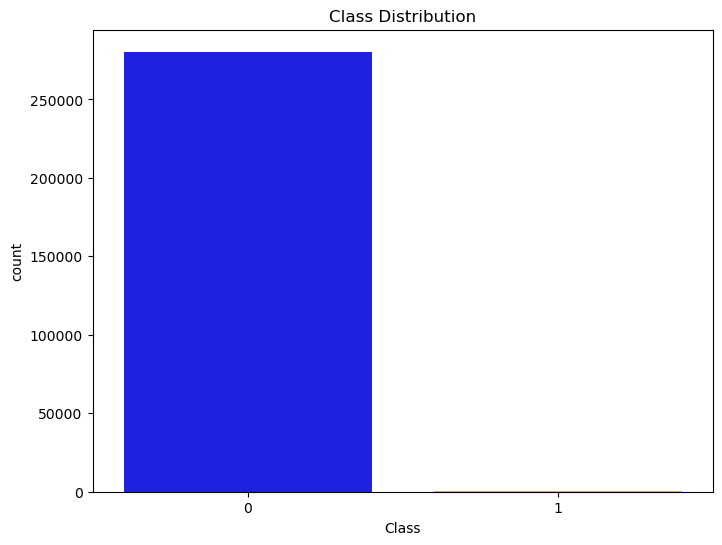

In [28]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=new_data, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

## Distribution of Classes After Resampling (SMOTE)

C:\Users\atish\AppData\Local\Temp\ipykernel_6116\1519754497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette=custom_palette)


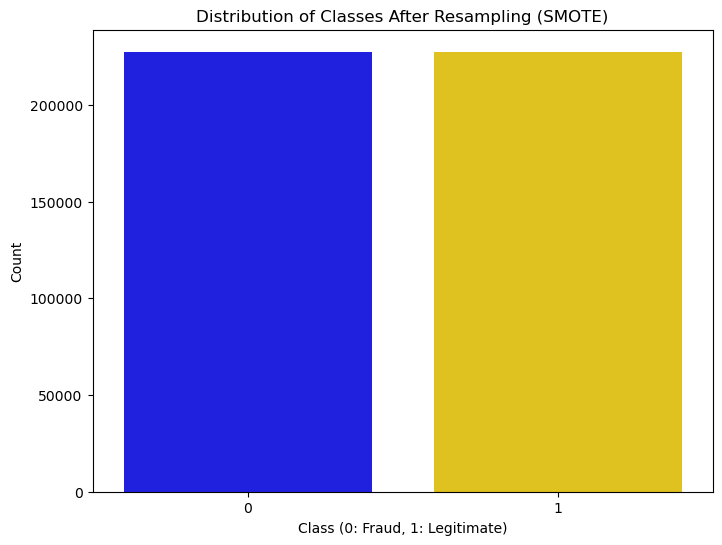

In [30]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

#                          **Model Building**

## Logistic Regression

In [33]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")

Logistic Regression Results:
Accuracy: 0.9722
Precision: 0.0541
Recall: 0.9184
F1-Score: 0.1022


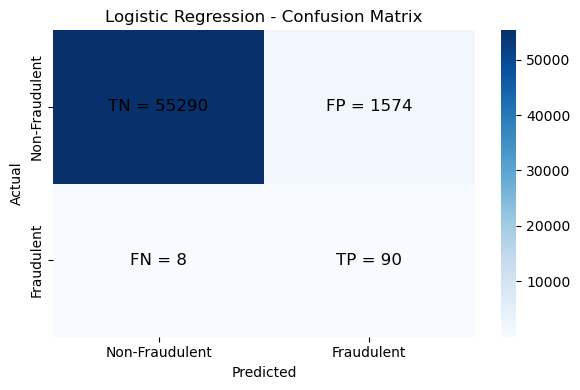

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Annotate with TP, TN, etc.
matrix_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        value = cm[i][j]
        label = matrix_labels[i][j]
        ax.text(j + 0.5, i + 0.5, f'{label} = {value}', 
                ha='center', va='center', color='black', fontsize=12)

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


Logistic Regression ROC-AUC Score: 0.9756195950524271


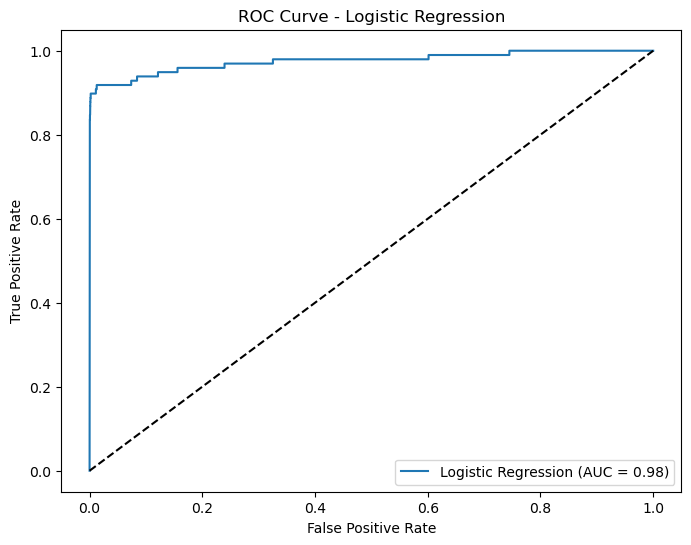

In [35]:
# Logistic Regression ROC-AUC
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [37]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")

Decision Tree Results:
Accuracy: 0.9641
Precision: 0.0410
Recall: 0.8878
F1-Score: 0.0784


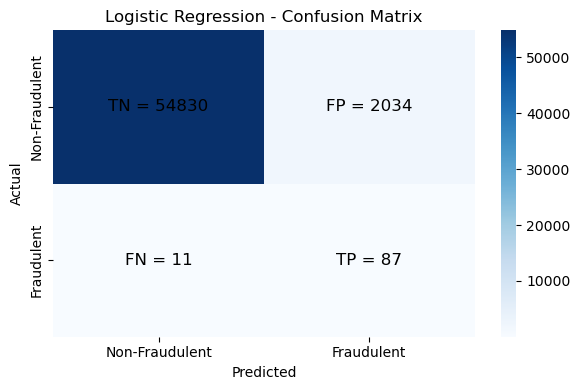

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Annotate with TP, TN, etc.
matrix_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        value = cm[i][j]
        label = matrix_labels[i][j]
        ax.text(j + 0.5, i + 0.5, f'{label} = {value}', 
                ha='center', va='center', color='black', fontsize=12)

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Decision Tree ROC-AUC Score: 0.953647908938477


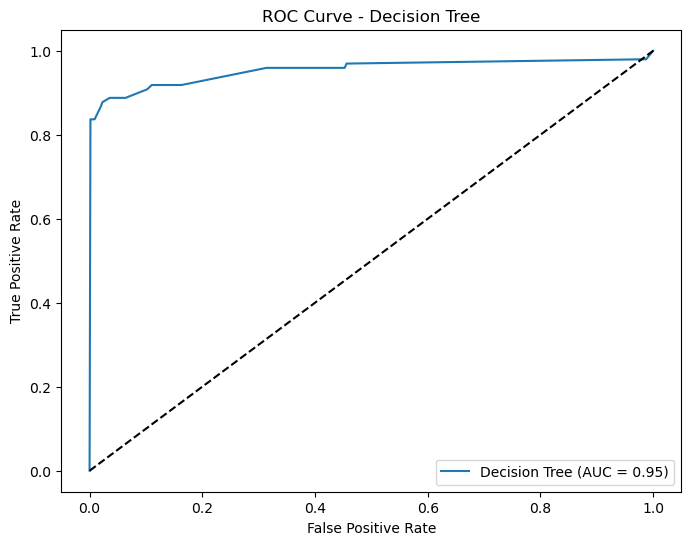

In [39]:
# Decision Tree ROC-AUC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

print("Decision Tree ROC-AUC Score:", roc_auc_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [41]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

Random Forest Results:
Accuracy: 0.9995
Precision: 0.8901
Recall: 0.8265
F1-Score: 0.8571


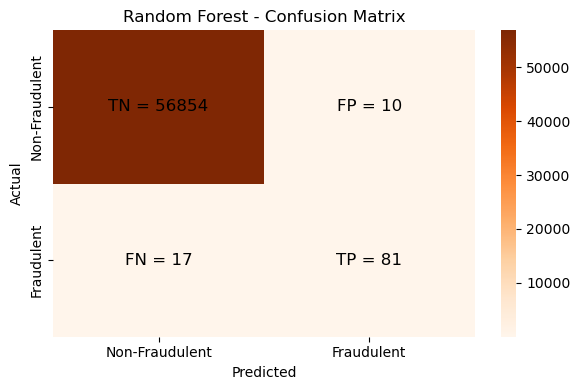

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=False, cmap='Oranges', xticklabels=labels, yticklabels=labels)

# Annotate with TP, TN, etc.
matrix_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        value = cm[i][j]
        label = matrix_labels[i][j]
        ax.text(j + 0.5, i + 0.5, f'{label} = {value}', 
                ha='center', va='center', color='black', fontsize=12)

plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Random Forest ROC-AUC Score: 0.9787566000654623


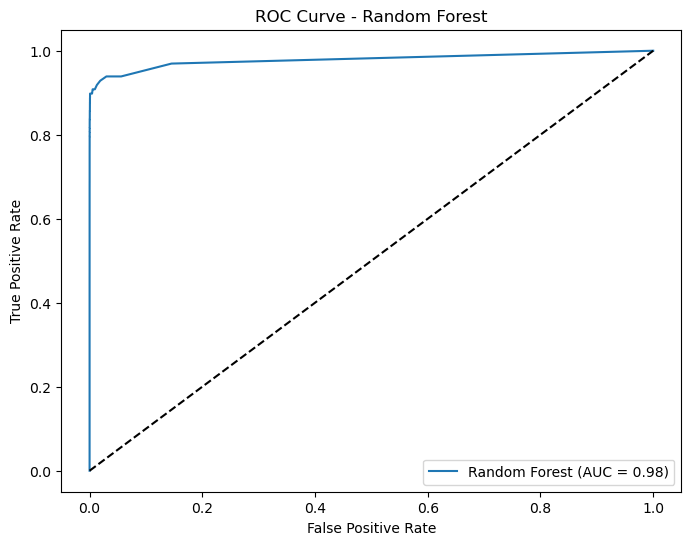

In [75]:
# Random Forest ROC-AUC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

print("Random Forest ROC-AUC Score:", roc_auc_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [77]:
# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")


XGBoost Results:
Accuracy: 0.9971
Precision: 0.3598
Recall: 0.8776
F1-Score: 0.5104


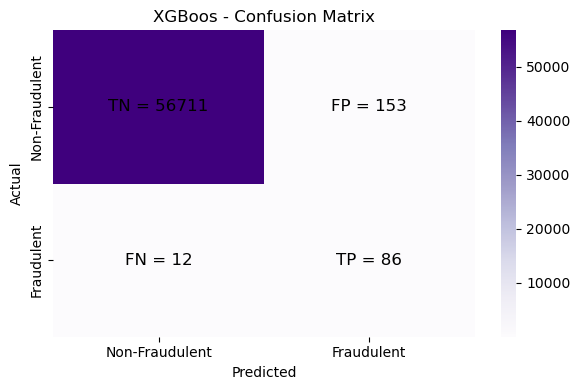

In [78]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=False, cmap='Purples', xticklabels=labels, yticklabels=labels)

# Annotate with TP, TN
matrix_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        value = cm[i][j]
        label = matrix_labels[i][j]
        ax.text(j + 0.5, i + 0.5, f'{label} = {value}', 
                ha='center', va='center', color='black', fontsize=12)

plt.title('XGBoos - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

XGBoost ROC-AUC Score: 0.9787419751243209


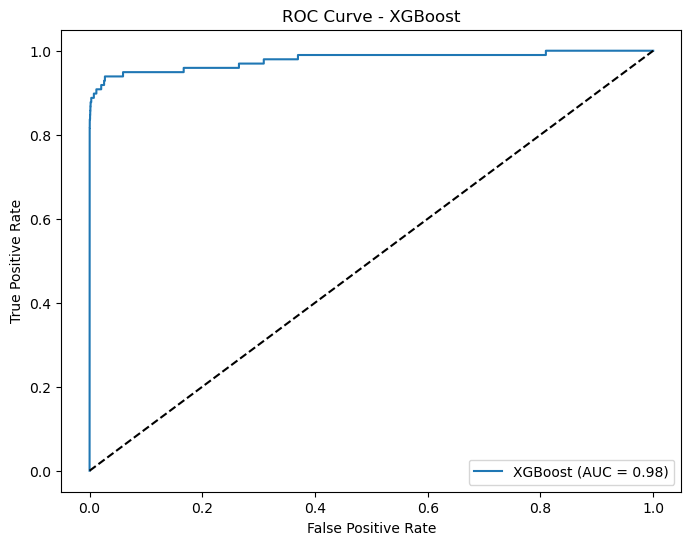

In [79]:
# XGBoost ROC-AUC
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

print("XGBoost ROC-AUC Score:", roc_auc_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

## Neural Network

In [99]:
#Scale the data (Neural Networks need scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)  # Using SMOTE-resampled training data
X_test_scaled = scaler.transform(X_test)  # Original test data (not resampled)
#Neural Network Model
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,),  # Single hidden layer with 50 neurons
    activation='relu',         # Rectified Linear Unit activation
    solver='adam',            # Optimizer
    max_iter=1000,            # Maximum iterations
    random_state=42,
    verbose=True              # Shows training progress
)
# Train the model
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train_smote)  # Using resampled labels
# Cell 3: Predictions and Evaluation
y_pred_nn = nn_model.predict(X_test_scaled)  # Using scaled test data

print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.4f}")

Training Neural Network...
Iteration 1, loss = 0.09022725
Iteration 2, loss = 0.03127568
Iteration 3, loss = 0.01888333
Iteration 4, loss = 0.01341026
Iteration 5, loss = 0.01028979
Iteration 6, loss = 0.00818170
Iteration 7, loss = 0.00683368
Iteration 8, loss = 0.00581387
Iteration 9, loss = 0.00509262
Iteration 10, loss = 0.00449065
Iteration 11, loss = 0.00404381
Iteration 12, loss = 0.00372867
Iteration 13, loss = 0.00332490
Iteration 14, loss = 0.00303263
Iteration 15, loss = 0.00286500
Iteration 16, loss = 0.00272012
Iteration 17, loss = 0.00240445
Iteration 18, loss = 0.00232640
Iteration 19, loss = 0.00207167
Iteration 20, loss = 0.00202490
Iteration 21, loss = 0.00191971
Iteration 22, loss = 0.00176472
Iteration 23, loss = 0.00171750
Iteration 24, loss = 0.00164308
Iteration 25, loss = 0.00150599
Iteration 26, loss = 0.00143139
Iteration 27, loss = 0.00137758
Iteration 28, loss = 0.00132167
Iteration 29, loss = 0.00127729
Iteration 30, loss = 0.00130140
Iteration 31, loss = 0

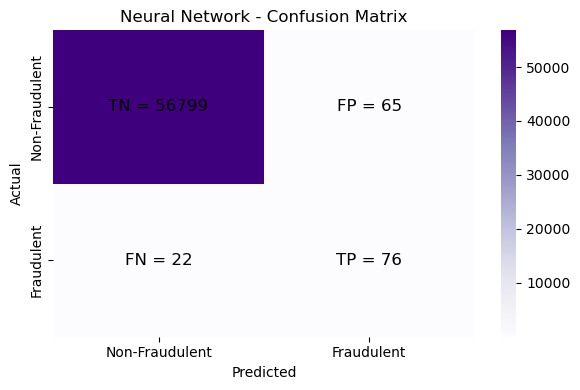

In [109]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=False, cmap='Purples', xticklabels=labels, yticklabels=labels)

# Annotate with TP, TN
matrix_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        value = cm[i][j]
        label = matrix_labels[i][j]
        ax.text(j + 0.5, i + 0.5, f'{label} = {value}', 
                ha='center', va='center', color='black', fontsize=12)

plt.title('Neural Network - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

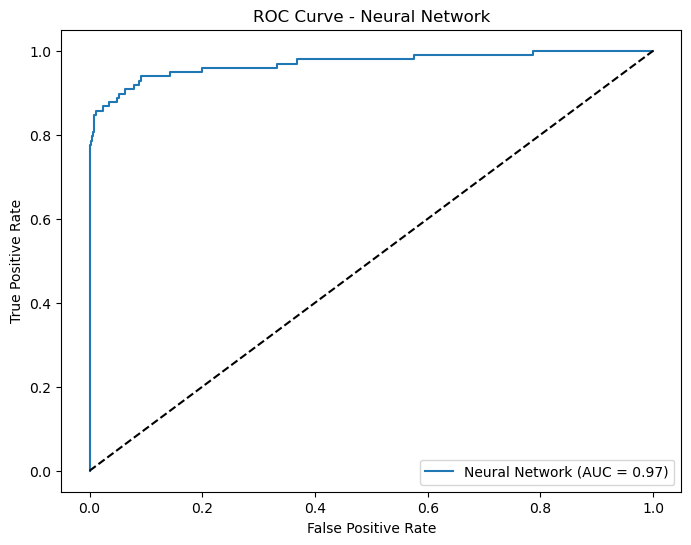

In [111]:
# ROC Curve and AUC Score (Additional Evaluation)
from sklearn.metrics import roc_auc_score, roc_curve

y_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
nn_auc = roc_auc_score(y_test, y_prob_nn)
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

# Model Comparison

Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.972227,0.054087,0.918367,0.102157
1,Decision Tree,0.964099,0.041018,0.887755,0.078414
2,Random Forest,0.999526,0.890110,0.826531,0.857143
3,XGBoost,0.997103,0.359833,0.877551,0.510386
4,Neural Network,0.998473,0.539007,0.775510,0.635983


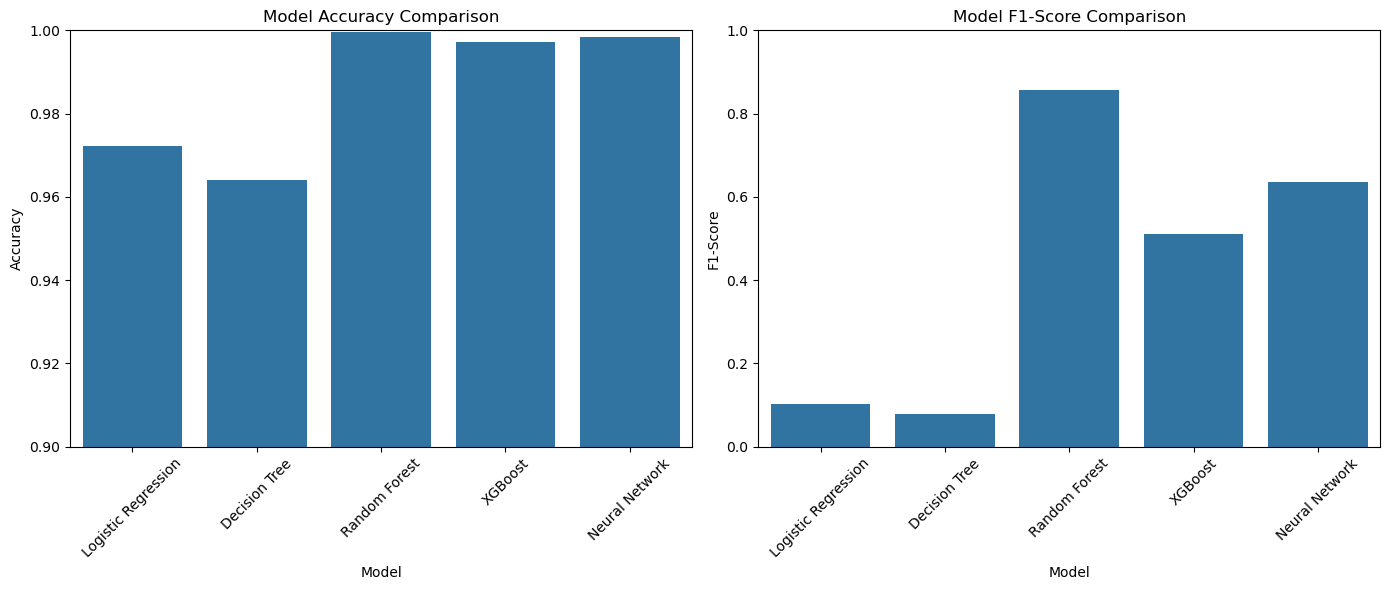

In [117]:
# Sabhi models ke results collect karo
results = [
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred_lr),
     'Precision': precision_score(y_test, y_pred_lr), 'Recall': recall_score(y_test, y_pred_lr),
     'F1-Score': f1_score(y_test, y_pred_lr)},
    
    {'Model': 'Decision Tree', 'Accuracy': accuracy_score(y_test, y_pred_dt),
     'Precision': precision_score(y_test, y_pred_dt), 'Recall': recall_score(y_test, y_pred_dt),
     'F1-Score': f1_score(y_test, y_pred_dt)},
    
    {'Model': 'Random Forest', 'Accuracy': accuracy_score(y_test, y_pred_rf),
     'Precision': precision_score(y_test, y_pred_rf), 'Recall': recall_score(y_test, y_pred_rf),
     'F1-Score': f1_score(y_test, y_pred_rf)},
    
    {'Model': 'XGBoost', 'Accuracy': accuracy_score(y_test, y_pred_xgb),
     'Precision': precision_score(y_test, y_pred_xgb), 'Recall': recall_score(y_test, y_pred_xgb),
     'F1-Score': f1_score(y_test, y_pred_xgb)},
    
    {'Model': 'Neural Network', 'Accuracy': accuracy_score(y_test, y_pred_nn),
     'Precision': precision_score(y_test, y_pred_nn), 'Recall': recall_score(y_test, y_pred_nn),
     'F1-Score': f1_score(y_test, y_pred_nn)}
]

# DataFrame mein convert karo
results_df = pd.DataFrame(results)

# Results display karo
print("Model Comparison:")
display(results_df)

# Visualization
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='F1-Score', data=results_df)
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

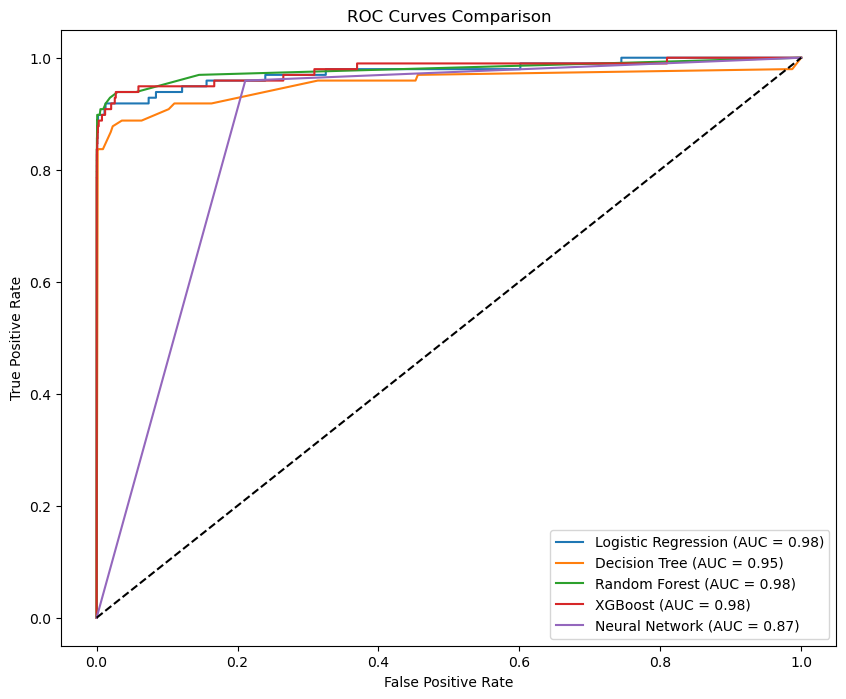

In [119]:
# All models comparison ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()